# Xây dựng mô hình Deep Learning dự đoán 1 người có bị tiểu đường hay không? 
(Outcome: 1: Tiểu đường, 0: Không bị tiểu đường)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Loading the data

In [2]:
diabetes = pd.read_csv("./diabetes.csv")

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning the Data

In [5]:
#---check for null values---
print("Nulls")
print("=====")
print(diabetes.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
#---check for 0s---
print("0s")
print("==")
print(diabetes.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
# replace the 0 values with NaN
diabetes[['Glucose','BloodPressure','SkinThickness', \
    'Insulin','BMI','DiabetesPedigreeFunction','Age']] = \
    diabetes[['Glucose','BloodPressure','SkinThickness', \
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace \
        (0,np.NaN)

In [8]:
print(diabetes.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [9]:
# replace them with the mean of each column
diabetes.fillna(diabetes.mean(numeric_only=True), inplace = True)

## Correlation between the features

In [10]:
# Examining the Correlation Between the Features
corr = diabetes.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.082989   
Glucose                      0.127911  1.000000       0.218367       0.192991   
BloodPressure                0.208522  0.218367       1.000000       0.192816   
SkinThickness                0.082989  0.192991       0.192816       1.000000   
Insulin                      0.056027  0.420157       0.072517       0.158139   
BMI                          0.021565  0.230941       0.281268       0.542398   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.100966   
Age                          0.544341  0.266534       0.324595       0.127872   
Outcome                      0.221898  0.492928       0.166074       0.215299   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.056027  0.021565                 -0.033523   
Glucose                   0.420157  0.230

C:\Users\Huypx\AppData\Local\Temp\ipykernel_6352\4179507499.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(diabetes.columns)


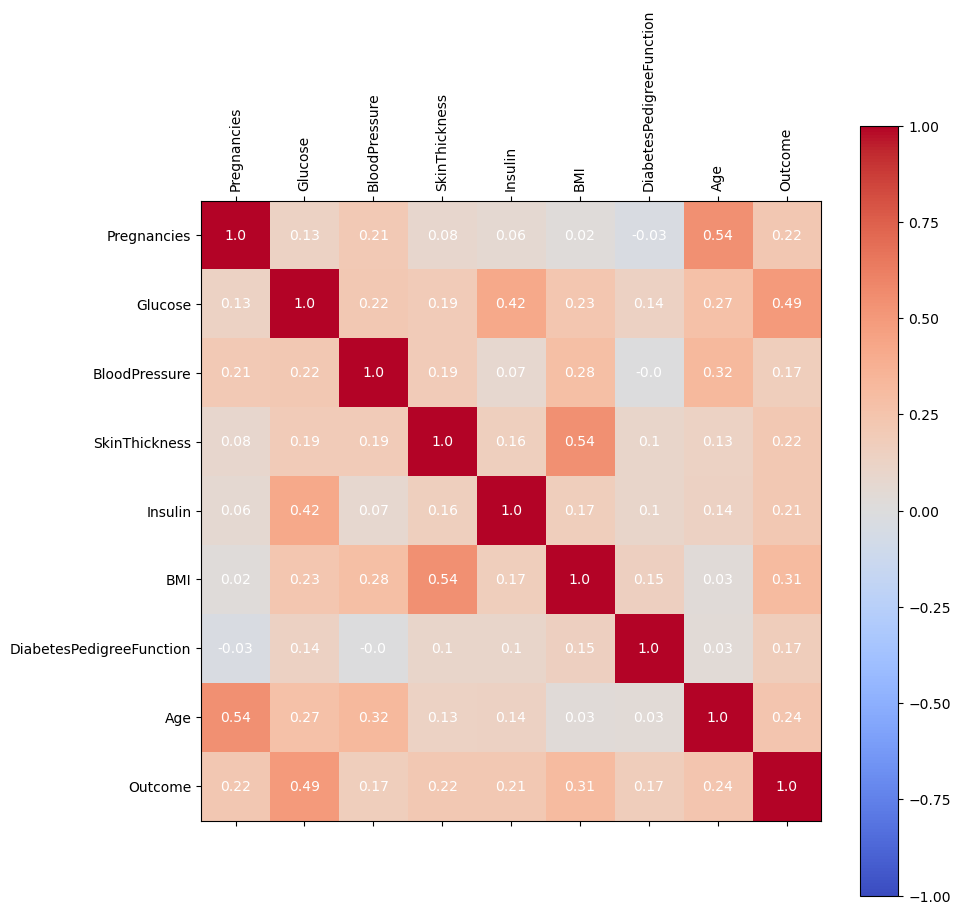

In [11]:
# Plotting the Correlation Between Features
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(diabetes.columns),1)
ax.set_xticks(ticks)
ax.set_xticklabels(diabetes.columns)
plt.xticks(rotation = 90)
ax.set_yticklabels(diabetes.columns)
ax.set_yticks(ticks)
#---print the correlation factor---
for i in range(diabetes.shape[1]):
    for j in range(9):
        text = ax.text(j, i, round(corr.iloc[i][j],2),ha="center", va="center", color="w")
plt.show()

## X & y

In [12]:
#---features---
X = diabetes.drop("Outcome", axis=1)
#---label---
y = diabetes.iloc[:,8]

## Normalization -  MinMaxScaler

In [13]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.transform(X)
X_scaled = pd.DataFrame(scaled, columns=diabetes.columns[:-1])
X_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.489796,0.304348,0.170130,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.170130,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.240798,0.170130,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.117647,0.503226,0.469388,0.217391,0.170130,0.380368,0.111870,0.100000
765,0.294118,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.058824,0.529032,0.367347,0.240798,0.170130,0.243354,0.115713,0.433333


## Train test split

In [15]:
np.random.seed(3005)
# Create train and test dataset with an 80:20 split+
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3005)
# Further divide training dataset into train and validation dataset with an 90:10 split
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state=3005)

#Check the shape of each new dataset created
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (552, 8)
Shape of X_test: (154, 8)
Shape of X_val: (62, 8)
Shape of y_train: (552,)
Shape of y_test: (154,)
Shape of y_val: (62,)


## Defining Model Baseline Accuracy

In [16]:
#Checking the distribution of values in the target
diabetes["Outcome"].value_counts()/diabetes.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Xây dựng mô hình Deep Learning phân loại nhị phân
optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"]

### 0 hidden layer - 1 neurons, batch_size=8

#### epochs=20

Epoch 1/20
69/69 [==============================] - 1s 6ms/step - loss: 0.6888 - accuracy: 0.5453 - val_loss: 0.6803 - val_accuracy: 0.6452
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5960 - val_loss: 0.6715 - val_accuracy: 0.6613
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6395 - val_loss: 0.6654 - val_accuracy: 0.6935
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.6431 - val_loss: 0.6597 - val_accuracy: 0.7097
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.6449 - val_loss: 0.6554 - val_accuracy: 0.6935
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.6449 - val_loss: 0.6522 - val_accuracy: 0.6935
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6656 - accuracy: 0.6449 - val_loss: 0.6485 - val_accuracy: 0.6935
Epoch 8/20
69/69 [==

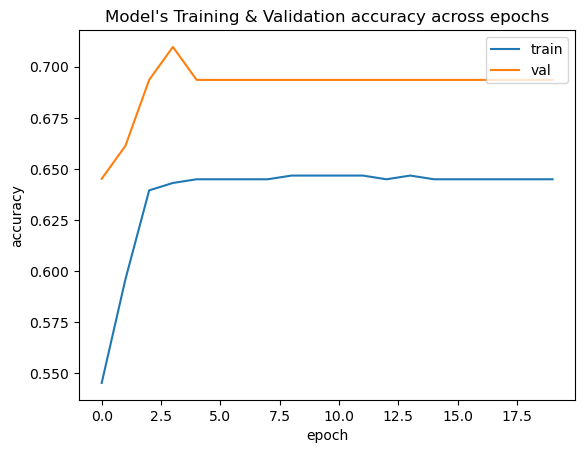

In [17]:
#Design the deep neural network
model = Sequential()
model.add(Dense(1, input_dim = X_train.shape[1], activation= "sigmoid")) #activation = sigmoid for binary classification 

#configure the model
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [18]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.6363 - accuracy: 0.6558


[0.6363274455070496, 0.6558441519737244]

#### epochs=100

Epoch 1/100
69/69 [==============================] - 0s 3ms/step - loss: 0.6420 - accuracy: 0.6449 - val_loss: 0.6201 - val_accuracy: 0.6935
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6401 - accuracy: 0.6449 - val_loss: 0.6190 - val_accuracy: 0.6935
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6387 - accuracy: 0.6486 - val_loss: 0.6177 - val_accuracy: 0.6935
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6467 - val_loss: 0.6159 - val_accuracy: 0.7097
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6358 - accuracy: 0.6504 - val_loss: 0.6144 - val_accuracy: 0.7097
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6341 - accuracy: 0.6504 - val_loss: 0.6123 - val_accuracy: 0.7097
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.6328 - accuracy: 0.6504 - val_loss: 0.6111 - val_accuracy: 0.7258
Epoch 8/100
6

Epoch 59/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5728 - accuracy: 0.7120 - val_loss: 0.5513 - val_accuracy: 0.8065
Epoch 60/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7156 - val_loss: 0.5505 - val_accuracy: 0.8065
Epoch 61/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7192 - val_loss: 0.5498 - val_accuracy: 0.8065
Epoch 62/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5704 - accuracy: 0.7156 - val_loss: 0.5486 - val_accuracy: 0.8065
Epoch 63/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5694 - accuracy: 0.7156 - val_loss: 0.5477 - val_accuracy: 0.8065
Epoch 64/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5687 - accuracy: 0.7192 - val_loss: 0.5473 - val_accuracy: 0.8065
Epoch 65/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7228 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 

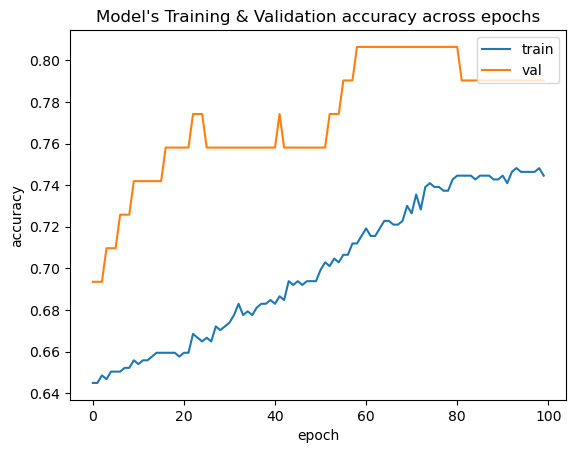

In [19]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [20]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.5506 - accuracy: 0.7338


[0.550636887550354, 0.7337662577629089]

#### epochs=350

Epoch 1/350
69/69 [==============================] - 0s 3ms/step - loss: 0.5420 - accuracy: 0.7464 - val_loss: 0.5236 - val_accuracy: 0.7903
Epoch 2/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5415 - accuracy: 0.7482 - val_loss: 0.5233 - val_accuracy: 0.7903
Epoch 3/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7446 - val_loss: 0.5225 - val_accuracy: 0.7903
Epoch 4/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5402 - accuracy: 0.7446 - val_loss: 0.5224 - val_accuracy: 0.7903
Epoch 5/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.7446 - val_loss: 0.5219 - val_accuracy: 0.7903
Epoch 6/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7446 - val_loss: 0.5214 - val_accuracy: 0.7903
Epoch 7/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7464 - val_loss: 0.5203 - val_accuracy: 0.7903
Epoch 8/350
6

Epoch 59/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5151 - accuracy: 0.7663 - val_loss: 0.5025 - val_accuracy: 0.7903
Epoch 60/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5145 - accuracy: 0.7627 - val_loss: 0.5014 - val_accuracy: 0.8065
Epoch 61/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5142 - accuracy: 0.7699 - val_loss: 0.5018 - val_accuracy: 0.7903
Epoch 62/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5138 - accuracy: 0.7645 - val_loss: 0.5007 - val_accuracy: 0.8065
Epoch 63/350
69/69 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7645 - val_loss: 0.5012 - val_accuracy: 0.7903
Epoch 64/350
69/69 [==============================] - 0s 2ms/step - loss: 0.5131 - accuracy: 0.7627 - val_loss: 0.5005 - val_accuracy: 0.7903
Epoch 65/350
69/69 [==============================] - 0s 3ms/step - loss: 0.5127 - accuracy: 0.7663 - val_loss: 0.5009 - val_accuracy: 0.7903
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7645 - val_loss: 0.4842 - val_accuracy: 0.7742
Epoch 174/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7627 - val_loss: 0.4837 - val_accuracy: 0.7903
Epoch 175/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7645 - val_loss: 0.4842 - val_accuracy: 0.7742
Epoch 176/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7645 - val_loss: 0.4836 - val_accuracy: 0.7903
Epoch 177/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4866 - accuracy: 0.7663 - val_loss: 0.4846 - val_accuracy: 0.7742
Epoch 178/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7645 - val_loss: 0.4833 - val_accuracy: 0.7903
Epoch 179/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.7645 - val_loss: 0.4839 - val_accuracy: 0.7742
Epoch 180/350

69/69 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7663 - val_loss: 0.4794 - val_accuracy: 0.7742
Epoch 288/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7736 - val_loss: 0.4782 - val_accuracy: 0.7742
Epoch 289/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7717 - val_loss: 0.4792 - val_accuracy: 0.7742
Epoch 290/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7699 - val_loss: 0.4786 - val_accuracy: 0.7742
Epoch 291/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4736 - accuracy: 0.7699 - val_loss: 0.4790 - val_accuracy: 0.7742
Epoch 292/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7681 - val_loss: 0.4789 - val_accuracy: 0.7742
Epoch 293/350
69/69 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7699 - val_loss: 0.4785 - val_accuracy: 0.7742
Epoch 294/350

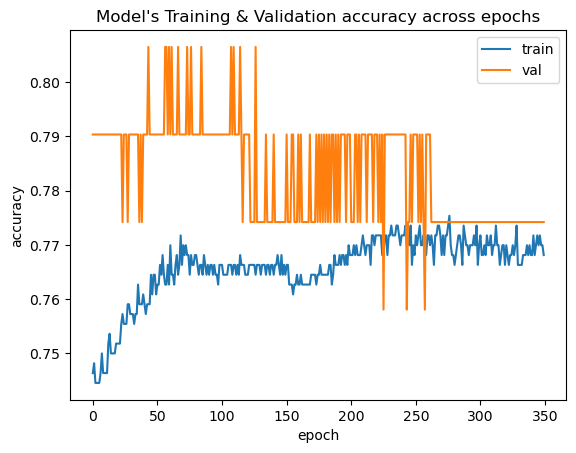

In [21]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=350, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [22]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7597


[0.49269139766693115, 0.7597402334213257]

#### epochs=500

Epoch 1/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7736 - val_loss: 0.4782 - val_accuracy: 0.7742
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7681 - val_loss: 0.4781 - val_accuracy: 0.7742
Epoch 3/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7717 - val_loss: 0.4781 - val_accuracy: 0.7742
Epoch 4/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7717 - val_loss: 0.4777 - val_accuracy: 0.7742
Epoch 5/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7699 - val_loss: 0.4782 - val_accuracy: 0.7742
Epoch 6/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4694 - accuracy: 0.7681 - val_loss: 0.4776 - val_accuracy: 0.7742
Epoch 7/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4693 - accuracy: 0.7699 - val_loss: 0.4778 - val_accuracy: 0.7742
Epoch 8/500
6

Epoch 59/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7717 - val_loss: 0.4780 - val_accuracy: 0.7742
Epoch 60/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7717 - val_loss: 0.4777 - val_accuracy: 0.7742
Epoch 61/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7736 - val_loss: 0.4777 - val_accuracy: 0.7742
Epoch 62/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4667 - accuracy: 0.7717 - val_loss: 0.4778 - val_accuracy: 0.7742
Epoch 63/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7736 - val_loss: 0.4776 - val_accuracy: 0.7742
Epoch 64/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4666 - accuracy: 0.7736 - val_loss: 0.4777 - val_accuracy: 0.7742
Epoch 65/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4665 - accuracy: 0.7736 - val_loss: 0.4776 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7736 - val_loss: 0.4784 - val_accuracy: 0.7742
Epoch 174/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7754 - val_loss: 0.4785 - val_accuracy: 0.7742
Epoch 175/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4632 - accuracy: 0.7717 - val_loss: 0.4786 - val_accuracy: 0.7742
Epoch 176/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7736 - val_loss: 0.4779 - val_accuracy: 0.7742
Epoch 177/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.7736 - val_loss: 0.4784 - val_accuracy: 0.7742
Epoch 178/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7736 - val_loss: 0.4779 - val_accuracy: 0.7742
Epoch 179/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4630 - accuracy: 0.7736 - val_loss: 0.4785 - val_accuracy: 0.7742
Epoch 180/500

69/69 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7717 - val_loss: 0.4795 - val_accuracy: 0.7742
Epoch 288/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4611 - accuracy: 0.7736 - val_loss: 0.4794 - val_accuracy: 0.7742
Epoch 289/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7717 - val_loss: 0.4799 - val_accuracy: 0.7742
Epoch 290/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4612 - accuracy: 0.7717 - val_loss: 0.4800 - val_accuracy: 0.7742
Epoch 291/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7717 - val_loss: 0.4795 - val_accuracy: 0.7742
Epoch 292/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.7717 - val_loss: 0.4796 - val_accuracy: 0.7742
Epoch 293/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7736 - val_loss: 0.4791 - val_accuracy: 0.7742
Epoch 294/500

69/69 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7717 - val_loss: 0.4812 - val_accuracy: 0.7742
Epoch 402/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7736 - val_loss: 0.4811 - val_accuracy: 0.7742
Epoch 403/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7717 - val_loss: 0.4809 - val_accuracy: 0.7742
Epoch 404/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7699 - val_loss: 0.4813 - val_accuracy: 0.7742
Epoch 405/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4595 - accuracy: 0.7736 - val_loss: 0.4805 - val_accuracy: 0.7742
Epoch 406/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.7699 - val_loss: 0.4805 - val_accuracy: 0.7742
Epoch 407/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7717 - val_loss: 0.4812 - val_accuracy: 0.7742
Epoch 408/500

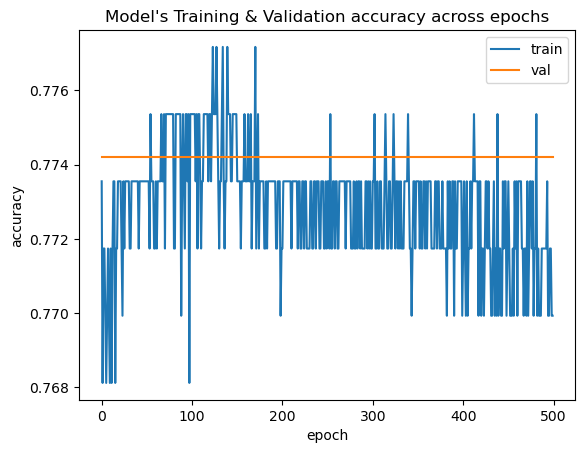

In [23]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=500, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [24]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.7662


[0.48724493384361267, 0.7662337422370911]

### 1 hidden layer - 8 neurons, batch_size=8

#### epochs=20

Epoch 1/20
69/69 [==============================] - 1s 3ms/step - loss: 0.6974 - accuracy: 0.4728 - val_loss: 0.6852 - val_accuracy: 0.6129
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.6486 - val_loss: 0.6645 - val_accuracy: 0.7258
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.6630 - val_loss: 0.6490 - val_accuracy: 0.6935
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6522 - val_loss: 0.6361 - val_accuracy: 0.7097
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.6667 - val_loss: 0.6280 - val_accuracy: 0.7097
Epoch 6/20
69/69 [==============================] - 0s 3ms/step - loss: 0.6399 - accuracy: 0.6522 - val_loss: 0.6189 - val_accuracy: 0.6935
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6313 - accuracy: 0.6667 - val_loss: 0.6090 - val_accuracy: 0.7097
Epoch 8/20
69/69 [==

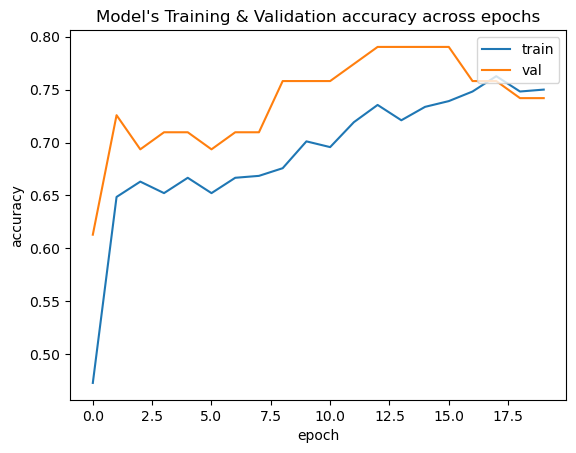

In [25]:
#Design the deep neural network
model = Sequential()
model.add(Dense(8, input_dim = X_train.shape[1], activation= "relu"))
model.add(Dense(1, activation = "sigmoid")) #activation = sigmoid for binary classification

#configure the model
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [26]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5439 - accuracy: 0.7338


[0.5439270734786987, 0.7337662577629089]

#### epochs=100

Epoch 1/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5325 - accuracy: 0.7627 - val_loss: 0.5202 - val_accuracy: 0.7581
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5267 - accuracy: 0.7681 - val_loss: 0.5168 - val_accuracy: 0.7581
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5216 - accuracy: 0.7663 - val_loss: 0.5112 - val_accuracy: 0.7581
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7699 - val_loss: 0.5078 - val_accuracy: 0.7581
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7663 - val_loss: 0.5064 - val_accuracy: 0.7742
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7645 - val_loss: 0.5020 - val_accuracy: 0.7742
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7736 - val_loss: 0.5028 - val_accuracy: 0.7581
Epoch 8/100
6

Epoch 59/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7826 - val_loss: 0.4735 - val_accuracy: 0.7581
Epoch 60/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.7772 - val_loss: 0.4750 - val_accuracy: 0.7581
Epoch 61/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.7736 - val_loss: 0.4726 - val_accuracy: 0.7581
Epoch 62/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7808 - val_loss: 0.4746 - val_accuracy: 0.7581
Epoch 63/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.7772 - val_loss: 0.4711 - val_accuracy: 0.7581
Epoch 64/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.7772 - val_loss: 0.4749 - val_accuracy: 0.7581
Epoch 65/100
69/69 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.7808 - val_loss: 0.4725 - val_accuracy: 0.7581
Epoch 

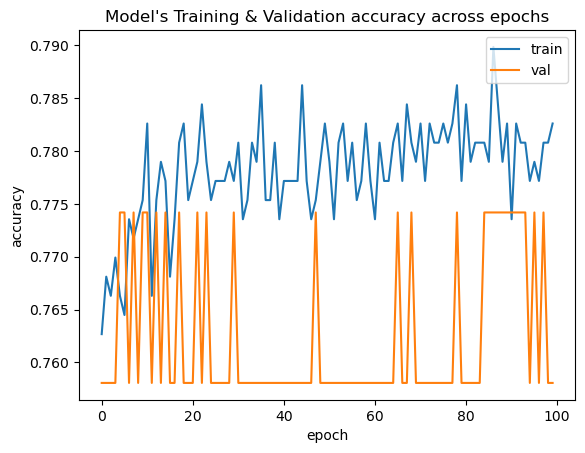

In [27]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [28]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4835 - accuracy: 0.7727


[0.48351961374282837, 0.7727272510528564]

#### epochs=350

Epoch 1/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4384 - accuracy: 0.7808 - val_loss: 0.4695 - val_accuracy: 0.7742
Epoch 2/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7790 - val_loss: 0.4712 - val_accuracy: 0.7581
Epoch 3/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7790 - val_loss: 0.4710 - val_accuracy: 0.7581
Epoch 4/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.7736 - val_loss: 0.4668 - val_accuracy: 0.7742
Epoch 5/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4381 - accuracy: 0.7844 - val_loss: 0.4691 - val_accuracy: 0.7742
Epoch 6/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7790 - val_loss: 0.4684 - val_accuracy: 0.7742
Epoch 7/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.7790 - val_loss: 0.4662 - val_accuracy: 0.7742
Epoch 8/350
6

Epoch 59/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7808 - val_loss: 0.4699 - val_accuracy: 0.7742
Epoch 60/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4298 - accuracy: 0.7862 - val_loss: 0.4736 - val_accuracy: 0.7742
Epoch 61/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.7826 - val_loss: 0.4718 - val_accuracy: 0.7742
Epoch 62/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7844 - val_loss: 0.4681 - val_accuracy: 0.7742
Epoch 63/350
69/69 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.7790 - val_loss: 0.4709 - val_accuracy: 0.7742
Epoch 64/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7844 - val_loss: 0.4716 - val_accuracy: 0.7742
Epoch 65/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7844 - val_loss: 0.4694 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.7880 - val_loss: 0.4704 - val_accuracy: 0.7903
Epoch 174/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4230 - accuracy: 0.7862 - val_loss: 0.4703 - val_accuracy: 0.7903
Epoch 175/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7862 - val_loss: 0.4714 - val_accuracy: 0.7742
Epoch 176/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.7899 - val_loss: 0.4694 - val_accuracy: 0.7903
Epoch 177/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7844 - val_loss: 0.4714 - val_accuracy: 0.7742
Epoch 178/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.7862 - val_loss: 0.4690 - val_accuracy: 0.7903
Epoch 179/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.7899 - val_loss: 0.4712 - val_accuracy: 0.7742
Epoch 180/350

69/69 [==============================] - 0s 3ms/step - loss: 0.4203 - accuracy: 0.7862 - val_loss: 0.4747 - val_accuracy: 0.7742
Epoch 288/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7917 - val_loss: 0.4675 - val_accuracy: 0.8065
Epoch 289/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7862 - val_loss: 0.4728 - val_accuracy: 0.7742
Epoch 290/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.7880 - val_loss: 0.4712 - val_accuracy: 0.8065
Epoch 291/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7862 - val_loss: 0.4686 - val_accuracy: 0.8065
Epoch 292/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7899 - val_loss: 0.4745 - val_accuracy: 0.7742
Epoch 293/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7862 - val_loss: 0.4718 - val_accuracy: 0.7903
Epoch 294/350

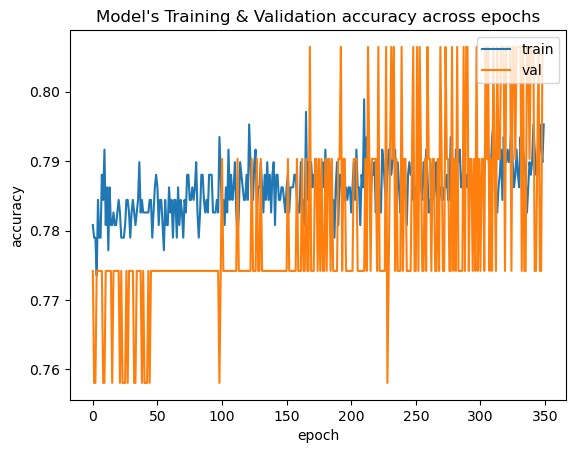

In [29]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=350, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [30]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 6ms/step - loss: 0.4873 - accuracy: 0.7532


[0.48731592297554016, 0.7532467246055603]

#### epochs=500

Epoch 1/500
69/69 [==============================] - 0s 3ms/step - loss: 0.4190 - accuracy: 0.7880 - val_loss: 0.4732 - val_accuracy: 0.7903
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7899 - val_loss: 0.4769 - val_accuracy: 0.7742
Epoch 3/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.7880 - val_loss: 0.4705 - val_accuracy: 0.8065
Epoch 4/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7953 - val_loss: 0.4684 - val_accuracy: 0.8065
Epoch 5/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7917 - val_loss: 0.4732 - val_accuracy: 0.7742
Epoch 6/500
69/69 [==============================] - 0s 3ms/step - loss: 0.4194 - accuracy: 0.7935 - val_loss: 0.4700 - val_accuracy: 0.8065
Epoch 7/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.7935 - val_loss: 0.4716 - val_accuracy: 0.8065
Epoch 8/500
6

Epoch 59/500
69/69 [==============================] - 0s 3ms/step - loss: 0.4184 - accuracy: 0.7899 - val_loss: 0.4731 - val_accuracy: 0.8065
Epoch 60/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.7899 - val_loss: 0.4714 - val_accuracy: 0.8065
Epoch 61/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.7917 - val_loss: 0.4702 - val_accuracy: 0.8065
Epoch 62/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.7917 - val_loss: 0.4699 - val_accuracy: 0.8065
Epoch 63/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.7899 - val_loss: 0.4690 - val_accuracy: 0.8065
Epoch 64/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7953 - val_loss: 0.4700 - val_accuracy: 0.8065
Epoch 65/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.7880 - val_loss: 0.4764 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4183 - accuracy: 0.7917 - val_loss: 0.4740 - val_accuracy: 0.8065
Epoch 174/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7844 - val_loss: 0.4720 - val_accuracy: 0.8065
Epoch 175/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7917 - val_loss: 0.4701 - val_accuracy: 0.8065
Epoch 176/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7917 - val_loss: 0.4671 - val_accuracy: 0.8065
Epoch 177/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.7935 - val_loss: 0.4714 - val_accuracy: 0.8065
Epoch 178/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4168 - accuracy: 0.7880 - val_loss: 0.4697 - val_accuracy: 0.8065
Epoch 179/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.7844 - val_loss: 0.4707 - val_accuracy: 0.8065
Epoch 180/500

69/69 [==============================] - 0s 3ms/step - loss: 0.4170 - accuracy: 0.7862 - val_loss: 0.4721 - val_accuracy: 0.8065
Epoch 288/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4159 - accuracy: 0.7917 - val_loss: 0.4695 - val_accuracy: 0.8065
Epoch 289/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7880 - val_loss: 0.4731 - val_accuracy: 0.8065
Epoch 290/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4156 - accuracy: 0.7880 - val_loss: 0.4697 - val_accuracy: 0.8065
Epoch 291/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4173 - accuracy: 0.7862 - val_loss: 0.4679 - val_accuracy: 0.8065
Epoch 292/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.7880 - val_loss: 0.4673 - val_accuracy: 0.8065
Epoch 293/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.7953 - val_loss: 0.4719 - val_accuracy: 0.8065
Epoch 294/500

69/69 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.7844 - val_loss: 0.4768 - val_accuracy: 0.8065
Epoch 402/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4158 - accuracy: 0.7935 - val_loss: 0.4790 - val_accuracy: 0.8065
Epoch 403/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.7880 - val_loss: 0.4855 - val_accuracy: 0.7742
Epoch 404/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.7989 - val_loss: 0.4744 - val_accuracy: 0.8065
Epoch 405/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4140 - accuracy: 0.7899 - val_loss: 0.4753 - val_accuracy: 0.8065
Epoch 406/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4152 - accuracy: 0.7917 - val_loss: 0.4714 - val_accuracy: 0.8065
Epoch 407/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4138 - accuracy: 0.7880 - val_loss: 0.4780 - val_accuracy: 0.7903
Epoch 408/500

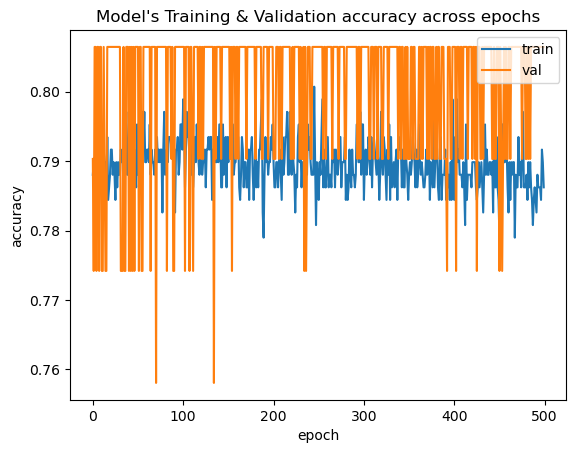

In [31]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=500, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [32]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.4931 - accuracy: 0.7662


[0.49312448501586914, 0.7662337422370911]

### 2 hidden layer - 8 neurons, batch_size=8

#### epochs=20

Epoch 1/20
69/69 [==============================] - 1s 4ms/step - loss: 0.6731 - accuracy: 0.6467 - val_loss: 0.6564 - val_accuracy: 0.6935
Epoch 2/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6467 - val_loss: 0.6390 - val_accuracy: 0.6935
Epoch 3/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6506 - accuracy: 0.6467 - val_loss: 0.6281 - val_accuracy: 0.6935
Epoch 4/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.6467 - val_loss: 0.6192 - val_accuracy: 0.6935
Epoch 5/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6325 - accuracy: 0.6467 - val_loss: 0.6101 - val_accuracy: 0.6935
Epoch 6/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6223 - accuracy: 0.6467 - val_loss: 0.5977 - val_accuracy: 0.6935
Epoch 7/20
69/69 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.6467 - val_loss: 0.5884 - val_accuracy: 0.6935
Epoch 8/20
69/69 [==

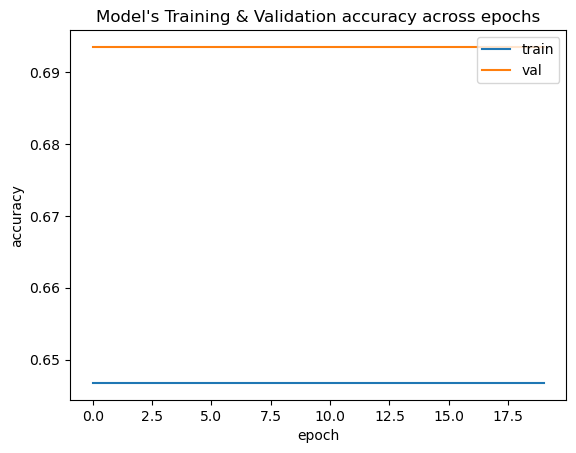

In [33]:
#Design the deep neural network
model = Sequential()
model.add(Dense(8, input_dim = X_train.shape[1], activation= "relu"))
model.add(Dense(8, activation= "relu"))
model.add(Dense(1, activation = "sigmoid")) #activation = sigmoid for binary classification

#configure the model
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=20, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [34]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.6494


[0.5427552461624146, 0.649350643157959]

#### epochs=100

Epoch 1/100
69/69 [==============================] - 0s 3ms/step - loss: 0.5246 - accuracy: 0.6775 - val_loss: 0.5173 - val_accuracy: 0.7742
Epoch 2/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5211 - accuracy: 0.7446 - val_loss: 0.5158 - val_accuracy: 0.7742
Epoch 3/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5178 - accuracy: 0.7536 - val_loss: 0.5131 - val_accuracy: 0.7903
Epoch 4/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5146 - accuracy: 0.7464 - val_loss: 0.5116 - val_accuracy: 0.7581
Epoch 5/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5116 - accuracy: 0.7536 - val_loss: 0.5099 - val_accuracy: 0.7581
Epoch 6/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5095 - accuracy: 0.7554 - val_loss: 0.5071 - val_accuracy: 0.7742
Epoch 7/100
69/69 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7663 - val_loss: 0.5059 - val_accuracy: 0.7419
Epoch 8/100
6

Epoch 59/100
69/69 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.7736 - val_loss: 0.4773 - val_accuracy: 0.7581
Epoch 60/100
69/69 [==============================] - 0s 4ms/step - loss: 0.4589 - accuracy: 0.7645 - val_loss: 0.4785 - val_accuracy: 0.7581
Epoch 61/100
69/69 [==============================] - 0s 5ms/step - loss: 0.4591 - accuracy: 0.7754 - val_loss: 0.4807 - val_accuracy: 0.7581
Epoch 62/100
69/69 [==============================] - 0s 3ms/step - loss: 0.4584 - accuracy: 0.7699 - val_loss: 0.4805 - val_accuracy: 0.7581
Epoch 63/100
69/69 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7717 - val_loss: 0.4820 - val_accuracy: 0.7581
Epoch 64/100
69/69 [==============================] - 0s 4ms/step - loss: 0.4577 - accuracy: 0.7736 - val_loss: 0.4788 - val_accuracy: 0.7581
Epoch 65/100
69/69 [==============================] - 0s 4ms/step - loss: 0.4565 - accuracy: 0.7772 - val_loss: 0.4828 - val_accuracy: 0.7581
Epoch 

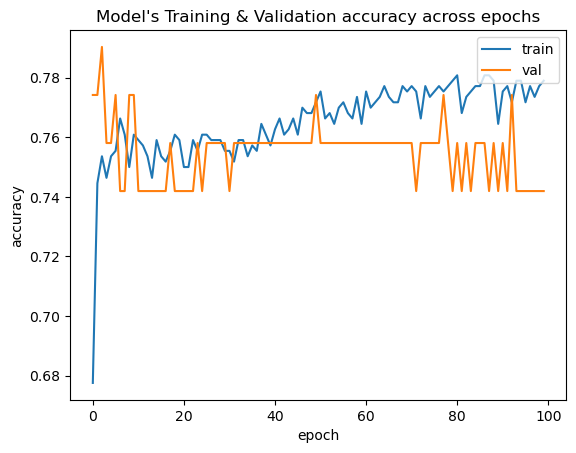

In [35]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=100, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [36]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7662


[0.46521154046058655, 0.7662337422370911]

#### epochs=350

Epoch 1/350
69/69 [==============================] - 0s 4ms/step - loss: 0.4500 - accuracy: 0.7772 - val_loss: 0.4833 - val_accuracy: 0.7419
Epoch 2/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7808 - val_loss: 0.4827 - val_accuracy: 0.7581
Epoch 3/350
69/69 [==============================] - 0s 3ms/step - loss: 0.4492 - accuracy: 0.7772 - val_loss: 0.4829 - val_accuracy: 0.7419
Epoch 4/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.7880 - val_loss: 0.4825 - val_accuracy: 0.7419
Epoch 5/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7808 - val_loss: 0.4823 - val_accuracy: 0.7419
Epoch 6/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7717 - val_loss: 0.4826 - val_accuracy: 0.7419
Epoch 7/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.7736 - val_loss: 0.4838 - val_accuracy: 0.7581
Epoch 8/350
6

Epoch 59/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.7754 - val_loss: 0.4813 - val_accuracy: 0.7742
Epoch 60/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7844 - val_loss: 0.4806 - val_accuracy: 0.7742
Epoch 61/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.7862 - val_loss: 0.4796 - val_accuracy: 0.7581
Epoch 62/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7826 - val_loss: 0.4809 - val_accuracy: 0.7742
Epoch 63/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4368 - accuracy: 0.7844 - val_loss: 0.4785 - val_accuracy: 0.7742
Epoch 64/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.7844 - val_loss: 0.4802 - val_accuracy: 0.7742
Epoch 65/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7844 - val_loss: 0.4809 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.7953 - val_loss: 0.4761 - val_accuracy: 0.7742
Epoch 174/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.7917 - val_loss: 0.4738 - val_accuracy: 0.7742
Epoch 175/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.7917 - val_loss: 0.4728 - val_accuracy: 0.7581
Epoch 176/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8025 - val_loss: 0.4742 - val_accuracy: 0.7742
Epoch 177/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.7953 - val_loss: 0.4750 - val_accuracy: 0.7742
Epoch 178/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.7953 - val_loss: 0.4778 - val_accuracy: 0.7903
Epoch 179/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4208 - accuracy: 0.7826 - val_loss: 0.4743 - val_accuracy: 0.7581
Epoch 180/350

69/69 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8116 - val_loss: 0.4711 - val_accuracy: 0.7903
Epoch 288/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4073 - accuracy: 0.8080 - val_loss: 0.4704 - val_accuracy: 0.7903
Epoch 289/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.7953 - val_loss: 0.4705 - val_accuracy: 0.7903
Epoch 290/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8098 - val_loss: 0.4739 - val_accuracy: 0.7903
Epoch 291/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8007 - val_loss: 0.4701 - val_accuracy: 0.7742
Epoch 292/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8062 - val_loss: 0.4694 - val_accuracy: 0.7903
Epoch 293/350
69/69 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8080 - val_loss: 0.4760 - val_accuracy: 0.7742
Epoch 294/350

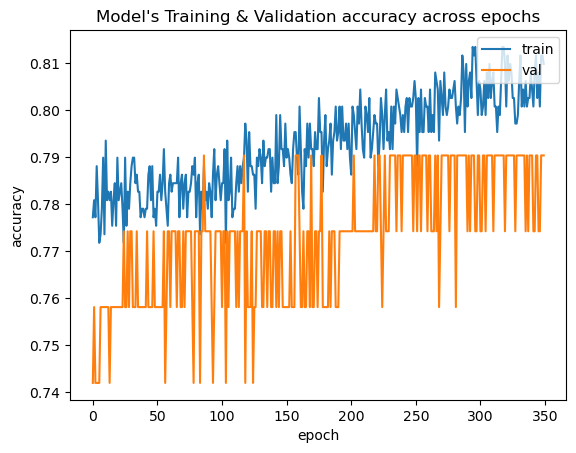

In [37]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=350, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [38]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7792


[0.4870348274707794, 0.7792207598686218]

#### epochs=500

Epoch 1/500
69/69 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.8062 - val_loss: 0.4715 - val_accuracy: 0.7903
Epoch 2/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8134 - val_loss: 0.4717 - val_accuracy: 0.7903
Epoch 3/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8080 - val_loss: 0.4695 - val_accuracy: 0.7742
Epoch 4/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8098 - val_loss: 0.4716 - val_accuracy: 0.7903
Epoch 5/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.7989 - val_loss: 0.4701 - val_accuracy: 0.7742
Epoch 6/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.8043 - val_loss: 0.4782 - val_accuracy: 0.7903
Epoch 7/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4001 - accuracy: 0.8098 - val_loss: 0.4721 - val_accuracy: 0.7903
Epoch 8/500
6

Epoch 59/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8025 - val_loss: 0.4742 - val_accuracy: 0.7742
Epoch 60/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8080 - val_loss: 0.4733 - val_accuracy: 0.7742
Epoch 61/500
69/69 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8080 - val_loss: 0.4768 - val_accuracy: 0.7903
Epoch 62/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3969 - accuracy: 0.8007 - val_loss: 0.4785 - val_accuracy: 0.8065
Epoch 63/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3951 - accuracy: 0.8080 - val_loss: 0.4843 - val_accuracy: 0.8065
Epoch 64/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8116 - val_loss: 0.4740 - val_accuracy: 0.7903
Epoch 65/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3961 - accuracy: 0.8080 - val_loss: 0.4794 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.3882 - accuracy: 0.8152 - val_loss: 0.4794 - val_accuracy: 0.7742
Epoch 174/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.8025 - val_loss: 0.4794 - val_accuracy: 0.7903
Epoch 175/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3895 - accuracy: 0.8116 - val_loss: 0.4791 - val_accuracy: 0.7742
Epoch 176/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.8152 - val_loss: 0.4794 - val_accuracy: 0.7903
Epoch 177/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.8116 - val_loss: 0.4810 - val_accuracy: 0.7903
Epoch 178/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8116 - val_loss: 0.4879 - val_accuracy: 0.8065
Epoch 179/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8170 - val_loss: 0.4804 - val_accuracy: 0.7903
Epoch 180/500

69/69 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8098 - val_loss: 0.4786 - val_accuracy: 0.7742
Epoch 288/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3825 - accuracy: 0.8170 - val_loss: 0.4830 - val_accuracy: 0.7742
Epoch 289/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.7971 - val_loss: 0.4762 - val_accuracy: 0.7742
Epoch 290/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8116 - val_loss: 0.4935 - val_accuracy: 0.7903
Epoch 291/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8098 - val_loss: 0.4878 - val_accuracy: 0.7742
Epoch 292/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8152 - val_loss: 0.4788 - val_accuracy: 0.7742
Epoch 293/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3781 - accuracy: 0.8098 - val_loss: 0.4951 - val_accuracy: 0.7581
Epoch 294/500

69/69 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8225 - val_loss: 0.4816 - val_accuracy: 0.7742
Epoch 402/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3732 - accuracy: 0.8116 - val_loss: 0.4813 - val_accuracy: 0.7742
Epoch 403/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3729 - accuracy: 0.8116 - val_loss: 0.4921 - val_accuracy: 0.7581
Epoch 404/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8188 - val_loss: 0.4883 - val_accuracy: 0.7581
Epoch 405/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8170 - val_loss: 0.4979 - val_accuracy: 0.7742
Epoch 406/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8116 - val_loss: 0.4826 - val_accuracy: 0.7581
Epoch 407/500
69/69 [==============================] - 0s 2ms/step - loss: 0.3767 - accuracy: 0.8170 - val_loss: 0.4794 - val_accuracy: 0.7742
Epoch 408/500

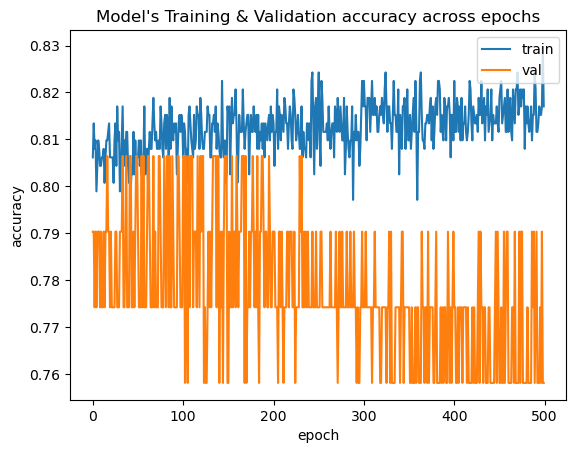

In [39]:
# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=500, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [40]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.7403


[0.5316476225852966, 0.7402597665786743]

### Deepest - 3 hidden layer - 16 neurons, batch_size=8, epochs=2000

#### without Dropout

Epoch 1/2000
69/69 [==============================] - 1s 5ms/step - loss: 0.6777 - accuracy: 0.6558 - val_loss: 0.6489 - val_accuracy: 0.7258
Epoch 2/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.6667 - val_loss: 0.6119 - val_accuracy: 0.8065
Epoch 3/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6866 - val_loss: 0.5583 - val_accuracy: 0.8226
Epoch 4/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5707 - accuracy: 0.7174 - val_loss: 0.5453 - val_accuracy: 0.7581
Epoch 5/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5326 - accuracy: 0.7446 - val_loss: 0.5289 - val_accuracy: 0.7581
Epoch 6/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7772 - val_loss: 0.4730 - val_accuracy: 0.7903
Epoch 7/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7591 - val_loss: 0.4674 - val_accuracy: 0.7742
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.3907 - accuracy: 0.8152 - val_loss: 0.4896 - val_accuracy: 0.7742
Epoch 116/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.8043 - val_loss: 0.4860 - val_accuracy: 0.7742
Epoch 117/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8134 - val_loss: 0.4837 - val_accuracy: 0.7581
Epoch 118/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3933 - accuracy: 0.8116 - val_loss: 0.4969 - val_accuracy: 0.7742
Epoch 119/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.8098 - val_loss: 0.4920 - val_accuracy: 0.7581
Epoch 120/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8080 - val_loss: 0.4891 - val_accuracy: 0.7903
Epoch 121/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8025 - val_loss: 0.4890 - val_accuracy: 0.7581
Epoch 1

Epoch 172/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3762 - accuracy: 0.8043 - val_loss: 0.4941 - val_accuracy: 0.7742
Epoch 173/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3765 - accuracy: 0.8170 - val_loss: 0.5090 - val_accuracy: 0.7581
Epoch 174/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3689 - accuracy: 0.8170 - val_loss: 0.5276 - val_accuracy: 0.7903
Epoch 175/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4019 - accuracy: 0.8134 - val_loss: 0.5009 - val_accuracy: 0.7581
Epoch 176/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8225 - val_loss: 0.4994 - val_accuracy: 0.7419
Epoch 177/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3752 - accuracy: 0.8080 - val_loss: 0.5104 - val_accuracy: 0.7581
Epoch 178/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3745 - accuracy: 0.8225 - val_loss: 0.5054 - val_accuracy:

Epoch 229/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8225 - val_loss: 0.5258 - val_accuracy: 0.7581
Epoch 230/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8170 - val_loss: 0.5289 - val_accuracy: 0.7419
Epoch 231/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.8261 - val_loss: 0.5332 - val_accuracy: 0.7742
Epoch 232/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8261 - val_loss: 0.5286 - val_accuracy: 0.7581
Epoch 233/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3650 - accuracy: 0.8080 - val_loss: 0.5304 - val_accuracy: 0.7742
Epoch 234/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8333 - val_loss: 0.5296 - val_accuracy: 0.7742
Epoch 235/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3616 - accuracy: 0.8225 - val_loss: 0.5506 - val_accuracy:

Epoch 286/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8315 - val_loss: 0.5618 - val_accuracy: 0.7742
Epoch 287/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3539 - accuracy: 0.8297 - val_loss: 0.5609 - val_accuracy: 0.7742
Epoch 288/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.5697 - val_accuracy: 0.7742
Epoch 289/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8351 - val_loss: 0.5611 - val_accuracy: 0.7742
Epoch 290/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8279 - val_loss: 0.5650 - val_accuracy: 0.7742
Epoch 291/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3492 - accuracy: 0.8351 - val_loss: 0.5728 - val_accuracy: 0.7742
Epoch 292/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8442 - val_loss: 0.5772 - val_accuracy:

Epoch 343/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.6149 - val_accuracy: 0.7742
Epoch 344/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8388 - val_loss: 0.6240 - val_accuracy: 0.7903
Epoch 345/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3393 - accuracy: 0.8406 - val_loss: 0.6025 - val_accuracy: 0.7903
Epoch 346/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8478 - val_loss: 0.6179 - val_accuracy: 0.7742
Epoch 347/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3462 - accuracy: 0.8388 - val_loss: 0.6236 - val_accuracy: 0.7742
Epoch 348/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3406 - accuracy: 0.8424 - val_loss: 0.6171 - val_accuracy: 0.7581
Epoch 349/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8460 - val_loss: 0.6198 - val_accuracy:

Epoch 400/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3319 - accuracy: 0.8460 - val_loss: 0.6246 - val_accuracy: 0.7742
Epoch 401/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8460 - val_loss: 0.6385 - val_accuracy: 0.7742
Epoch 402/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8514 - val_loss: 0.6365 - val_accuracy: 0.7419
Epoch 403/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8587 - val_loss: 0.6463 - val_accuracy: 0.7581
Epoch 404/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8442 - val_loss: 0.6737 - val_accuracy: 0.7742
Epoch 405/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3313 - accuracy: 0.8514 - val_loss: 0.6464 - val_accuracy: 0.7419
Epoch 406/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.8514 - val_loss: 0.6423 - val_accuracy:

Epoch 457/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8533 - val_loss: 0.6838 - val_accuracy: 0.7742
Epoch 458/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8533 - val_loss: 0.6774 - val_accuracy: 0.7419
Epoch 459/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3204 - accuracy: 0.8551 - val_loss: 0.6704 - val_accuracy: 0.7419
Epoch 460/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8551 - val_loss: 0.6574 - val_accuracy: 0.7581
Epoch 461/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8587 - val_loss: 0.6546 - val_accuracy: 0.8065
Epoch 462/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8496 - val_loss: 0.7044 - val_accuracy: 0.7581
Epoch 463/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8424 - val_loss: 0.6866 - val_accuracy:

Epoch 514/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3137 - accuracy: 0.8587 - val_loss: 0.7179 - val_accuracy: 0.7903
Epoch 515/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8659 - val_loss: 0.7387 - val_accuracy: 0.7903
Epoch 516/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8496 - val_loss: 0.7357 - val_accuracy: 0.7419
Epoch 517/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8605 - val_loss: 0.7482 - val_accuracy: 0.7097
Epoch 518/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8641 - val_loss: 0.7418 - val_accuracy: 0.7258
Epoch 519/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8496 - val_loss: 0.7315 - val_accuracy: 0.7419
Epoch 520/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3066 - accuracy: 0.8496 - val_loss: 0.7468 - val_accuracy:

Epoch 571/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8623 - val_loss: 0.8105 - val_accuracy: 0.7742
Epoch 572/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8569 - val_loss: 0.7635 - val_accuracy: 0.7419
Epoch 573/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 0.8659 - val_loss: 0.8097 - val_accuracy: 0.7581
Epoch 574/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8659 - val_loss: 0.8077 - val_accuracy: 0.7258
Epoch 575/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2976 - accuracy: 0.8714 - val_loss: 0.7915 - val_accuracy: 0.7903
Epoch 576/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3055 - accuracy: 0.8714 - val_loss: 0.8050 - val_accuracy: 0.7581
Epoch 577/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3069 - accuracy: 0.8569 - val_loss: 0.8101 - val_accuracy:

Epoch 628/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3000 - accuracy: 0.8623 - val_loss: 0.8465 - val_accuracy: 0.7581
Epoch 629/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2932 - accuracy: 0.8714 - val_loss: 0.8525 - val_accuracy: 0.7581
Epoch 630/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 0.8714 - val_loss: 0.8075 - val_accuracy: 0.7742
Epoch 631/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8696 - val_loss: 0.8691 - val_accuracy: 0.7903
Epoch 632/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2892 - accuracy: 0.8750 - val_loss: 0.8233 - val_accuracy: 0.7581
Epoch 633/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.8750 - val_loss: 0.8408 - val_accuracy: 0.7581
Epoch 634/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8696 - val_loss: 0.8470 - val_accuracy:

Epoch 685/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.8714 - val_loss: 0.9267 - val_accuracy: 0.7419
Epoch 686/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8768 - val_loss: 0.9001 - val_accuracy: 0.7097
Epoch 687/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8750 - val_loss: 0.8825 - val_accuracy: 0.7903
Epoch 688/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8732 - val_loss: 0.8412 - val_accuracy: 0.7581
Epoch 689/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2812 - accuracy: 0.8696 - val_loss: 0.8730 - val_accuracy: 0.7258
Epoch 690/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2841 - accuracy: 0.8859 - val_loss: 0.8395 - val_accuracy: 0.7419
Epoch 691/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2783 - accuracy: 0.8768 - val_loss: 0.8699 - val_accuracy:

Epoch 742/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2734 - accuracy: 0.8877 - val_loss: 0.9360 - val_accuracy: 0.7581
Epoch 743/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8732 - val_loss: 0.9512 - val_accuracy: 0.7903
Epoch 744/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2895 - accuracy: 0.8696 - val_loss: 0.9403 - val_accuracy: 0.7419
Epoch 745/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8804 - val_loss: 0.9452 - val_accuracy: 0.7903
Epoch 746/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8641 - val_loss: 0.9034 - val_accuracy: 0.7419
Epoch 747/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.8804 - val_loss: 0.9024 - val_accuracy: 0.7581
Epoch 748/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2697 - accuracy: 0.8822 - val_loss: 0.8818 - val_accuracy:

Epoch 799/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2731 - accuracy: 0.8877 - val_loss: 0.9388 - val_accuracy: 0.7742
Epoch 800/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2631 - accuracy: 0.8895 - val_loss: 0.9450 - val_accuracy: 0.7581
Epoch 801/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2633 - accuracy: 0.8841 - val_loss: 0.9390 - val_accuracy: 0.7419
Epoch 802/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2597 - accuracy: 0.8986 - val_loss: 0.9598 - val_accuracy: 0.7258
Epoch 803/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.8877 - val_loss: 0.9017 - val_accuracy: 0.7742
Epoch 804/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8859 - val_loss: 0.9098 - val_accuracy: 0.7742
Epoch 805/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2598 - accuracy: 0.8895 - val_loss: 0.9552 - val_accuracy:

Epoch 856/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8822 - val_loss: 1.0325 - val_accuracy: 0.6935
Epoch 857/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2592 - accuracy: 0.8895 - val_loss: 1.0305 - val_accuracy: 0.7419
Epoch 858/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2607 - accuracy: 0.8841 - val_loss: 1.0133 - val_accuracy: 0.7581
Epoch 859/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8949 - val_loss: 1.0459 - val_accuracy: 0.7581
Epoch 860/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2555 - accuracy: 0.8895 - val_loss: 1.0214 - val_accuracy: 0.7581
Epoch 861/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2558 - accuracy: 0.8859 - val_loss: 1.0052 - val_accuracy: 0.7581
Epoch 862/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.8841 - val_loss: 1.0570 - val_accuracy:

Epoch 913/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2423 - accuracy: 0.8949 - val_loss: 1.0436 - val_accuracy: 0.7742
Epoch 914/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2544 - accuracy: 0.8841 - val_loss: 1.0670 - val_accuracy: 0.7581
Epoch 915/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2460 - accuracy: 0.8949 - val_loss: 1.0559 - val_accuracy: 0.7581
Epoch 916/2000
69/69 [==============================] - 0s 6ms/step - loss: 0.2478 - accuracy: 0.8949 - val_loss: 1.0392 - val_accuracy: 0.7742
Epoch 917/2000
69/69 [==============================] - 0s 4ms/step - loss: 0.2485 - accuracy: 0.8877 - val_loss: 1.0718 - val_accuracy: 0.7903
Epoch 918/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.8967 - val_loss: 1.0376 - val_accuracy: 0.7742
Epoch 919/2000
69/69 [==============================] - 0s 4ms/step - loss: 0.2449 - accuracy: 0.8931 - val_loss: 1.0489 - val_accuracy:

Epoch 970/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 0.9058 - val_loss: 1.1365 - val_accuracy: 0.7903
Epoch 971/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.8986 - val_loss: 1.1335 - val_accuracy: 0.7742
Epoch 972/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2462 - accuracy: 0.8931 - val_loss: 1.1273 - val_accuracy: 0.7742
Epoch 973/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.9004 - val_loss: 1.1236 - val_accuracy: 0.7742
Epoch 974/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2373 - accuracy: 0.9058 - val_loss: 1.1211 - val_accuracy: 0.7903
Epoch 975/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2372 - accuracy: 0.9022 - val_loss: 1.1358 - val_accuracy: 0.7742
Epoch 976/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.8931 - val_loss: 1.1376 - val_accuracy:

Epoch 1027/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.9004 - val_loss: 1.1273 - val_accuracy: 0.7742
Epoch 1028/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9058 - val_loss: 1.1522 - val_accuracy: 0.7742
Epoch 1029/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9076 - val_loss: 1.1448 - val_accuracy: 0.7742
Epoch 1030/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2309 - accuracy: 0.9022 - val_loss: 1.1547 - val_accuracy: 0.7742
Epoch 1031/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.8967 - val_loss: 1.1283 - val_accuracy: 0.7742
Epoch 1032/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2273 - accuracy: 0.9149 - val_loss: 1.1471 - val_accuracy: 0.7742
Epoch 1033/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 0.9058 - val_loss: 1.1385 - val_ac

69/69 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9185 - val_loss: 1.1812 - val_accuracy: 0.7742
Epoch 1140/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 0.9058 - val_loss: 1.2199 - val_accuracy: 0.7419
Epoch 1141/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2241 - accuracy: 0.9058 - val_loss: 1.2143 - val_accuracy: 0.7581
Epoch 1142/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2177 - accuracy: 0.9004 - val_loss: 1.2005 - val_accuracy: 0.7581
Epoch 1143/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2134 - accuracy: 0.9149 - val_loss: 1.1743 - val_accuracy: 0.7581
Epoch 1144/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2137 - accuracy: 0.9094 - val_loss: 1.1941 - val_accuracy: 0.7419
Epoch 1145/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9167 - val_loss: 1.1955 - val_accuracy: 0.7258
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.9203 - val_loss: 1.1952 - val_accuracy: 0.7258
Epoch 1252/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9167 - val_loss: 1.2079 - val_accuracy: 0.7581
Epoch 1253/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9094 - val_loss: 1.1825 - val_accuracy: 0.7097
Epoch 1254/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1981 - accuracy: 0.9257 - val_loss: 1.2254 - val_accuracy: 0.7258
Epoch 1255/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9094 - val_loss: 1.1673 - val_accuracy: 0.7419
Epoch 1256/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2009 - accuracy: 0.9167 - val_loss: 1.2120 - val_accuracy: 0.7097
Epoch 1257/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9330 - val_loss: 1.2196 - val_accuracy: 0.7258
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9130 - val_loss: 1.1995 - val_accuracy: 0.7581
Epoch 1364/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9149 - val_loss: 1.1243 - val_accuracy: 0.7419
Epoch 1365/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2143 - accuracy: 0.9094 - val_loss: 1.2358 - val_accuracy: 0.7258
Epoch 1366/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1902 - accuracy: 0.9221 - val_loss: 1.1926 - val_accuracy: 0.7419
Epoch 1367/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9112 - val_loss: 1.1509 - val_accuracy: 0.7419
Epoch 1368/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9275 - val_loss: 1.1503 - val_accuracy: 0.7581
Epoch 1369/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1940 - accuracy: 0.9185 - val_loss: 1.2206 - val_accuracy: 0.7258
E

69/69 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.9185 - val_loss: 1.1733 - val_accuracy: 0.7419
Epoch 1476/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1835 - accuracy: 0.9149 - val_loss: 1.1773 - val_accuracy: 0.7419
Epoch 1477/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1706 - accuracy: 0.9330 - val_loss: 1.1810 - val_accuracy: 0.7419
Epoch 1478/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1840 - accuracy: 0.9203 - val_loss: 1.1560 - val_accuracy: 0.7419
Epoch 1479/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9239 - val_loss: 1.1105 - val_accuracy: 0.7258
Epoch 1480/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1795 - accuracy: 0.9257 - val_loss: 1.1820 - val_accuracy: 0.7581
Epoch 1481/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9040 - val_loss: 1.1269 - val_accuracy: 0.7258
E

69/69 [==============================] - 0s 2ms/step - loss: 0.1644 - accuracy: 0.9275 - val_loss: 1.2324 - val_accuracy: 0.7097
Epoch 1588/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1628 - accuracy: 0.9275 - val_loss: 1.1946 - val_accuracy: 0.7258
Epoch 1589/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9330 - val_loss: 1.1921 - val_accuracy: 0.7742
Epoch 1590/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9149 - val_loss: 1.1626 - val_accuracy: 0.7419
Epoch 1591/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1669 - accuracy: 0.9293 - val_loss: 1.1785 - val_accuracy: 0.7419
Epoch 1592/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9203 - val_loss: 1.2143 - val_accuracy: 0.7419
Epoch 1593/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9239 - val_loss: 1.2147 - val_accuracy: 0.7419
E

69/69 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9348 - val_loss: 1.1616 - val_accuracy: 0.7419
Epoch 1700/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9420 - val_loss: 1.1477 - val_accuracy: 0.7581
Epoch 1701/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9257 - val_loss: 1.2857 - val_accuracy: 0.7419
Epoch 1702/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1501 - accuracy: 0.9366 - val_loss: 1.2313 - val_accuracy: 0.7419
Epoch 1703/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.9366 - val_loss: 1.2798 - val_accuracy: 0.7419
Epoch 1704/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1510 - accuracy: 0.9330 - val_loss: 1.2543 - val_accuracy: 0.7419
Epoch 1705/2000
69/69 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9312 - val_loss: 1.2520 - val_accuracy: 0.7419
E

69/69 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9275 - val_loss: 1.3306 - val_accuracy: 0.7419
Epoch 1812/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9366 - val_loss: 1.3671 - val_accuracy: 0.7581
Epoch 1813/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9402 - val_loss: 1.3514 - val_accuracy: 0.7742
Epoch 1814/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9511 - val_loss: 1.3125 - val_accuracy: 0.7419
Epoch 1815/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1405 - accuracy: 0.9475 - val_loss: 1.3648 - val_accuracy: 0.7581
Epoch 1816/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9547 - val_loss: 1.3136 - val_accuracy: 0.7419
Epoch 1817/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1336 - accuracy: 0.9457 - val_loss: 1.2958 - val_accuracy: 0.7742
E

69/69 [==============================] - 0s 2ms/step - loss: 0.1199 - accuracy: 0.9475 - val_loss: 1.2504 - val_accuracy: 0.7097
Epoch 1924/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1281 - accuracy: 0.9457 - val_loss: 1.2978 - val_accuracy: 0.7097
Epoch 1925/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9511 - val_loss: 1.1910 - val_accuracy: 0.7419
Epoch 1926/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.1163 - accuracy: 0.9529 - val_loss: 1.1299 - val_accuracy: 0.7419
Epoch 1927/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1244 - accuracy: 0.9529 - val_loss: 1.1854 - val_accuracy: 0.7419
Epoch 1928/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1223 - accuracy: 0.9511 - val_loss: 1.2275 - val_accuracy: 0.7419
Epoch 1929/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.1189 - accuracy: 0.9583 - val_loss: 1.2228 - val_accuracy: 0.7419
E

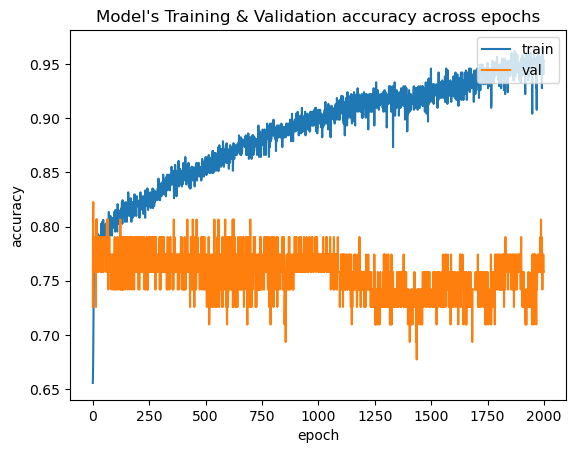

In [41]:
#Design the deep neural network
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(16, activation= "relu"))
model.add(Dense(1, activation = "sigmoid")) #activation = sigmoid for binary classification

#configure the model
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=2000, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [42]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 2.2667 - accuracy: 0.7273


[2.266693592071533, 0.7272727489471436]

#### withDropout

Epoch 1/2000
69/69 [==============================] - 1s 3ms/step - loss: 0.6867 - accuracy: 0.5797 - val_loss: 0.6691 - val_accuracy: 0.6935
Epoch 2/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.6467 - val_loss: 0.6390 - val_accuracy: 0.6935
Epoch 3/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6467 - val_loss: 0.5793 - val_accuracy: 0.6935
Epoch 4/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5887 - accuracy: 0.6902 - val_loss: 0.5386 - val_accuracy: 0.7581
Epoch 5/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5649 - accuracy: 0.7138 - val_loss: 0.5208 - val_accuracy: 0.7097
Epoch 6/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5369 - accuracy: 0.7482 - val_loss: 0.4972 - val_accuracy: 0.7742
Epoch 7/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.5234 - accuracy: 0.7373 - val_loss: 0.4951 - val_accuracy: 0.7419
Epoch 

69/69 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7844 - val_loss: 0.4864 - val_accuracy: 0.7742
Epoch 116/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.7844 - val_loss: 0.4703 - val_accuracy: 0.7581
Epoch 117/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7844 - val_loss: 0.4760 - val_accuracy: 0.7419
Epoch 118/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4189 - accuracy: 0.7971 - val_loss: 0.4773 - val_accuracy: 0.8065
Epoch 119/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.7917 - val_loss: 0.4738 - val_accuracy: 0.7581
Epoch 120/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.7935 - val_loss: 0.4818 - val_accuracy: 0.7903
Epoch 121/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7862 - val_loss: 0.4828 - val_accuracy: 0.7581
Epoch 1

Epoch 172/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.7808 - val_loss: 0.4687 - val_accuracy: 0.7581
Epoch 173/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4008 - accuracy: 0.8025 - val_loss: 0.4763 - val_accuracy: 0.7581
Epoch 174/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.7826 - val_loss: 0.4676 - val_accuracy: 0.7581
Epoch 175/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8007 - val_loss: 0.4750 - val_accuracy: 0.7581
Epoch 176/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.8134 - val_loss: 0.4946 - val_accuracy: 0.7903
Epoch 177/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.7989 - val_loss: 0.4712 - val_accuracy: 0.7581
Epoch 178/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4098 - accuracy: 0.8043 - val_loss: 0.4848 - val_accuracy:

Epoch 229/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3913 - accuracy: 0.8062 - val_loss: 0.4968 - val_accuracy: 0.7903
Epoch 230/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.8098 - val_loss: 0.4669 - val_accuracy: 0.7742
Epoch 231/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8188 - val_loss: 0.4710 - val_accuracy: 0.7419
Epoch 232/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3926 - accuracy: 0.8116 - val_loss: 0.4671 - val_accuracy: 0.8065
Epoch 233/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3918 - accuracy: 0.8152 - val_loss: 0.4877 - val_accuracy: 0.7581
Epoch 234/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8134 - val_loss: 0.4875 - val_accuracy: 0.7581
Epoch 235/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8098 - val_loss: 0.4908 - val_accuracy:

Epoch 286/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8152 - val_loss: 0.4709 - val_accuracy: 0.7742
Epoch 287/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8025 - val_loss: 0.4555 - val_accuracy: 0.7903
Epoch 288/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8188 - val_loss: 0.4821 - val_accuracy: 0.7581
Epoch 289/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8261 - val_loss: 0.4707 - val_accuracy: 0.7581
Epoch 290/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3778 - accuracy: 0.8188 - val_loss: 0.4696 - val_accuracy: 0.7903
Epoch 291/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3764 - accuracy: 0.8297 - val_loss: 0.4713 - val_accuracy: 0.8065
Epoch 292/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3768 - accuracy: 0.8080 - val_loss: 0.4775 - val_accuracy:

Epoch 343/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3578 - accuracy: 0.8297 - val_loss: 0.5006 - val_accuracy: 0.8065
Epoch 344/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8297 - val_loss: 0.4820 - val_accuracy: 0.7903
Epoch 345/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8351 - val_loss: 0.4813 - val_accuracy: 0.8065
Epoch 346/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.8333 - val_loss: 0.4848 - val_accuracy: 0.8065
Epoch 347/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8243 - val_loss: 0.4787 - val_accuracy: 0.8065
Epoch 348/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3503 - accuracy: 0.8406 - val_loss: 0.4853 - val_accuracy: 0.8226
Epoch 349/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8297 - val_loss: 0.4836 - val_accuracy:

Epoch 400/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8207 - val_loss: 0.5045 - val_accuracy: 0.8065
Epoch 401/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8279 - val_loss: 0.4925 - val_accuracy: 0.8065
Epoch 402/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8351 - val_loss: 0.5026 - val_accuracy: 0.7903
Epoch 403/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8297 - val_loss: 0.4870 - val_accuracy: 0.7903
Epoch 404/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8243 - val_loss: 0.4894 - val_accuracy: 0.8065
Epoch 405/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8279 - val_loss: 0.4872 - val_accuracy: 0.7903
Epoch 406/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3746 - accuracy: 0.8225 - val_loss: 0.4801 - val_accuracy:

Epoch 457/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8333 - val_loss: 0.5179 - val_accuracy: 0.8065
Epoch 458/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3466 - accuracy: 0.8315 - val_loss: 0.5053 - val_accuracy: 0.8065
Epoch 459/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8315 - val_loss: 0.4880 - val_accuracy: 0.8226
Epoch 460/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8370 - val_loss: 0.5022 - val_accuracy: 0.8065
Epoch 461/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3165 - accuracy: 0.8551 - val_loss: 0.4958 - val_accuracy: 0.8226
Epoch 462/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8424 - val_loss: 0.4905 - val_accuracy: 0.7742
Epoch 463/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3375 - accuracy: 0.8279 - val_loss: 0.5084 - val_accuracy:

Epoch 514/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8478 - val_loss: 0.5257 - val_accuracy: 0.8226
Epoch 515/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8533 - val_loss: 0.5420 - val_accuracy: 0.7742
Epoch 516/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8551 - val_loss: 0.5323 - val_accuracy: 0.7742
Epoch 517/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3335 - accuracy: 0.8533 - val_loss: 0.5258 - val_accuracy: 0.8065
Epoch 518/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8442 - val_loss: 0.5192 - val_accuracy: 0.8226
Epoch 519/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8551 - val_loss: 0.5264 - val_accuracy: 0.8065
Epoch 520/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.8460 - val_loss: 0.5319 - val_accuracy:

Epoch 571/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8551 - val_loss: 0.5187 - val_accuracy: 0.8387
Epoch 572/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3173 - accuracy: 0.8514 - val_loss: 0.5420 - val_accuracy: 0.8065
Epoch 573/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8659 - val_loss: 0.5400 - val_accuracy: 0.8226
Epoch 574/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3131 - accuracy: 0.8768 - val_loss: 0.5408 - val_accuracy: 0.8226
Epoch 575/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.8696 - val_loss: 0.5304 - val_accuracy: 0.8387
Epoch 576/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2954 - accuracy: 0.8678 - val_loss: 0.5377 - val_accuracy: 0.8226
Epoch 577/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2919 - accuracy: 0.8696 - val_loss: 0.5418 - val_accuracy:

Epoch 628/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8605 - val_loss: 0.5543 - val_accuracy: 0.8065
Epoch 629/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3132 - accuracy: 0.8587 - val_loss: 0.5173 - val_accuracy: 0.8226
Epoch 630/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3031 - accuracy: 0.8659 - val_loss: 0.5367 - val_accuracy: 0.8065
Epoch 631/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2860 - accuracy: 0.8804 - val_loss: 0.5386 - val_accuracy: 0.8226
Epoch 632/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8460 - val_loss: 0.5433 - val_accuracy: 0.8226
Epoch 633/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.8732 - val_loss: 0.5121 - val_accuracy: 0.8387
Epoch 634/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2876 - accuracy: 0.8732 - val_loss: 0.5440 - val_accuracy:

Epoch 685/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8678 - val_loss: 0.5362 - val_accuracy: 0.8226
Epoch 686/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.8714 - val_loss: 0.5421 - val_accuracy: 0.8226
Epoch 687/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2911 - accuracy: 0.8623 - val_loss: 0.5286 - val_accuracy: 0.8226
Epoch 688/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8859 - val_loss: 0.5459 - val_accuracy: 0.8226
Epoch 689/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8587 - val_loss: 0.5246 - val_accuracy: 0.8226
Epoch 690/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2938 - accuracy: 0.8641 - val_loss: 0.5358 - val_accuracy: 0.8226
Epoch 691/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.8804 - val_loss: 0.5678 - val_accuracy:

Epoch 742/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8696 - val_loss: 0.5601 - val_accuracy: 0.8226
Epoch 743/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2967 - accuracy: 0.8641 - val_loss: 0.5440 - val_accuracy: 0.8065
Epoch 744/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8605 - val_loss: 0.5389 - val_accuracy: 0.7903
Epoch 745/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8569 - val_loss: 0.5698 - val_accuracy: 0.8065
Epoch 746/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8587 - val_loss: 0.5445 - val_accuracy: 0.8226
Epoch 747/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8641 - val_loss: 0.5608 - val_accuracy: 0.8387
Epoch 748/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8732 - val_loss: 0.5530 - val_accuracy:

Epoch 799/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2848 - accuracy: 0.8623 - val_loss: 0.5839 - val_accuracy: 0.8226
Epoch 800/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8623 - val_loss: 0.5736 - val_accuracy: 0.8226
Epoch 801/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2784 - accuracy: 0.8696 - val_loss: 0.5646 - val_accuracy: 0.8226
Epoch 802/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2808 - accuracy: 0.8841 - val_loss: 0.5544 - val_accuracy: 0.8226
Epoch 803/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2907 - accuracy: 0.8587 - val_loss: 0.5670 - val_accuracy: 0.8065
Epoch 804/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2825 - accuracy: 0.8714 - val_loss: 0.6117 - val_accuracy: 0.8226
Epoch 805/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8678 - val_loss: 0.6115 - val_accuracy:

Epoch 856/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2804 - accuracy: 0.8822 - val_loss: 0.5890 - val_accuracy: 0.8065
Epoch 857/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2750 - accuracy: 0.8750 - val_loss: 0.6517 - val_accuracy: 0.8065
Epoch 858/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2753 - accuracy: 0.8696 - val_loss: 0.5782 - val_accuracy: 0.8387
Epoch 859/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3093 - accuracy: 0.8750 - val_loss: 0.5847 - val_accuracy: 0.7903
Epoch 860/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.8768 - val_loss: 0.6306 - val_accuracy: 0.8226
Epoch 861/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.8841 - val_loss: 0.6065 - val_accuracy: 0.7903
Epoch 862/2000
69/69 [==============================] - 0s 3ms/step - loss: 0.3051 - accuracy: 0.8768 - val_loss: 0.5853 - val_accuracy:

Epoch 913/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.8859 - val_loss: 0.6304 - val_accuracy: 0.8226
Epoch 914/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2728 - accuracy: 0.8732 - val_loss: 0.6239 - val_accuracy: 0.8226
Epoch 915/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.8841 - val_loss: 0.6232 - val_accuracy: 0.8065
Epoch 916/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8786 - val_loss: 0.6126 - val_accuracy: 0.8226
Epoch 917/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.8750 - val_loss: 0.5972 - val_accuracy: 0.8226
Epoch 918/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2534 - accuracy: 0.8877 - val_loss: 0.6361 - val_accuracy: 0.7903
Epoch 919/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8678 - val_loss: 0.5707 - val_accuracy:

Epoch 970/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2716 - accuracy: 0.8768 - val_loss: 0.6130 - val_accuracy: 0.7903
Epoch 971/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8678 - val_loss: 0.6413 - val_accuracy: 0.7903
Epoch 972/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.8750 - val_loss: 0.6058 - val_accuracy: 0.8226
Epoch 973/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.8732 - val_loss: 0.6234 - val_accuracy: 0.7903
Epoch 974/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.8786 - val_loss: 0.6209 - val_accuracy: 0.8065
Epoch 975/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.8877 - val_loss: 0.6695 - val_accuracy: 0.7903
Epoch 976/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2604 - accuracy: 0.8841 - val_loss: 0.6920 - val_accuracy:

Epoch 1027/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2660 - accuracy: 0.8605 - val_loss: 0.6496 - val_accuracy: 0.8226
Epoch 1028/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2800 - accuracy: 0.8822 - val_loss: 0.6272 - val_accuracy: 0.7903
Epoch 1029/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.8822 - val_loss: 0.6210 - val_accuracy: 0.7742
Epoch 1030/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2579 - accuracy: 0.8877 - val_loss: 0.6738 - val_accuracy: 0.7903
Epoch 1031/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8877 - val_loss: 0.6864 - val_accuracy: 0.8065
Epoch 1032/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8859 - val_loss: 0.6442 - val_accuracy: 0.7742
Epoch 1033/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2500 - accuracy: 0.8931 - val_loss: 0.6726 - val_ac

69/69 [==============================] - 0s 3ms/step - loss: 0.2640 - accuracy: 0.8841 - val_loss: 0.6356 - val_accuracy: 0.8065
Epoch 1140/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2719 - accuracy: 0.8822 - val_loss: 0.6628 - val_accuracy: 0.7903
Epoch 1141/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2416 - accuracy: 0.8913 - val_loss: 0.6477 - val_accuracy: 0.8065
Epoch 1142/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.8859 - val_loss: 0.6544 - val_accuracy: 0.8065
Epoch 1143/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.8732 - val_loss: 0.6189 - val_accuracy: 0.8065
Epoch 1144/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2511 - accuracy: 0.9022 - val_loss: 0.6125 - val_accuracy: 0.8065
Epoch 1145/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.8895 - val_loss: 0.6910 - val_accuracy: 0.7903
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8949 - val_loss: 0.6397 - val_accuracy: 0.8065
Epoch 1252/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.8841 - val_loss: 0.6617 - val_accuracy: 0.8226
Epoch 1253/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9058 - val_loss: 0.6290 - val_accuracy: 0.8226
Epoch 1254/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8877 - val_loss: 0.6662 - val_accuracy: 0.8065
Epoch 1255/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2272 - accuracy: 0.9076 - val_loss: 0.6949 - val_accuracy: 0.8065
Epoch 1256/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2468 - accuracy: 0.8895 - val_loss: 0.6696 - val_accuracy: 0.8065
Epoch 1257/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2619 - accuracy: 0.8986 - val_loss: 0.6631 - val_accuracy: 0.8065
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2129 - accuracy: 0.9130 - val_loss: 0.7935 - val_accuracy: 0.7742
Epoch 1364/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.8949 - val_loss: 0.7432 - val_accuracy: 0.7903
Epoch 1365/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.9004 - val_loss: 0.7650 - val_accuracy: 0.7903
Epoch 1366/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2445 - accuracy: 0.9022 - val_loss: 0.7560 - val_accuracy: 0.7903
Epoch 1367/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.8967 - val_loss: 0.7297 - val_accuracy: 0.7581
Epoch 1368/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.8895 - val_loss: 0.7396 - val_accuracy: 0.7581
Epoch 1369/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2594 - accuracy: 0.8877 - val_loss: 0.7733 - val_accuracy: 0.7903
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9112 - val_loss: 0.7324 - val_accuracy: 0.7742
Epoch 1476/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2359 - accuracy: 0.8859 - val_loss: 0.7271 - val_accuracy: 0.8226
Epoch 1477/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2450 - accuracy: 0.8967 - val_loss: 0.6987 - val_accuracy: 0.8065
Epoch 1478/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2561 - accuracy: 0.9022 - val_loss: 0.7145 - val_accuracy: 0.8226
Epoch 1479/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2232 - accuracy: 0.8913 - val_loss: 0.7111 - val_accuracy: 0.8226
Epoch 1480/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.8967 - val_loss: 0.7417 - val_accuracy: 0.8226
Epoch 1481/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2291 - accuracy: 0.9058 - val_loss: 0.7302 - val_accuracy: 0.8226
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9004 - val_loss: 0.8061 - val_accuracy: 0.7903
Epoch 1588/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2637 - accuracy: 0.8913 - val_loss: 0.7625 - val_accuracy: 0.7903
Epoch 1589/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8931 - val_loss: 0.7467 - val_accuracy: 0.8226
Epoch 1590/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1958 - accuracy: 0.9275 - val_loss: 0.7829 - val_accuracy: 0.8226
Epoch 1591/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2303 - accuracy: 0.9130 - val_loss: 0.7959 - val_accuracy: 0.7903
Epoch 1592/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9004 - val_loss: 0.7385 - val_accuracy: 0.7742
Epoch 1593/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9094 - val_loss: 0.8242 - val_accuracy: 0.8065
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2266 - accuracy: 0.9022 - val_loss: 0.8024 - val_accuracy: 0.8226
Epoch 1700/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.8967 - val_loss: 0.7918 - val_accuracy: 0.8226
Epoch 1701/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9004 - val_loss: 0.8246 - val_accuracy: 0.7903
Epoch 1702/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2260 - accuracy: 0.9004 - val_loss: 0.8028 - val_accuracy: 0.7742
Epoch 1703/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2425 - accuracy: 0.8931 - val_loss: 0.8315 - val_accuracy: 0.8065
Epoch 1704/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8949 - val_loss: 0.8310 - val_accuracy: 0.8065
Epoch 1705/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2276 - accuracy: 0.8931 - val_loss: 0.7743 - val_accuracy: 0.7742
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2135 - accuracy: 0.9221 - val_loss: 0.7928 - val_accuracy: 0.7581
Epoch 1812/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2259 - accuracy: 0.9130 - val_loss: 0.8134 - val_accuracy: 0.7742
Epoch 1813/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1931 - accuracy: 0.9203 - val_loss: 0.8330 - val_accuracy: 0.8226
Epoch 1814/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2336 - accuracy: 0.9004 - val_loss: 0.7868 - val_accuracy: 0.7419
Epoch 1815/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2181 - accuracy: 0.9022 - val_loss: 0.8209 - val_accuracy: 0.7903
Epoch 1816/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9058 - val_loss: 0.8023 - val_accuracy: 0.7903
Epoch 1817/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.9022 - val_loss: 0.8211 - val_accuracy: 0.7742
E

69/69 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9058 - val_loss: 0.8001 - val_accuracy: 0.7742
Epoch 1924/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.9094 - val_loss: 0.7531 - val_accuracy: 0.7742
Epoch 1925/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9203 - val_loss: 0.8247 - val_accuracy: 0.8226
Epoch 1926/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9203 - val_loss: 0.7822 - val_accuracy: 0.7581
Epoch 1927/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.8859 - val_loss: 0.7939 - val_accuracy: 0.7903
Epoch 1928/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2236 - accuracy: 0.8895 - val_loss: 0.8068 - val_accuracy: 0.7742
Epoch 1929/2000
69/69 [==============================] - 0s 2ms/step - loss: 0.2081 - accuracy: 0.9094 - val_loss: 0.8187 - val_accuracy: 0.7903
E

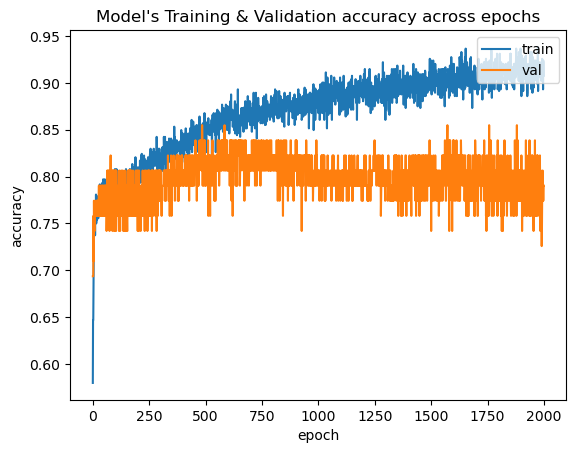

In [43]:
#Design the deep neural network
model = Sequential()
model.add(Dense(16, input_dim = X_train.shape[1], activation= "relu"))
model.add(Dropout(rate = 0.1,seed=100))
model.add(Dense(16, activation= "relu"))
model.add(Dropout(rate = 0.1,seed=100))
model.add(Dense(16, activation= "relu"))
model.add(Dense(1, activation = "sigmoid")) #activation = sigmoid for binary classification

#configure the model
model.compile(optimizer = "adam",loss="binary_crossentropy", metrics=["accuracy"])

# train the model
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=2000, batch_size=8)
print(history.history.keys())

# add show A plot of accuracy on the training and validation datasets overtraining epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.title("Model's Training & Validation accuracy across epochs")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [44]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 1.0353 - accuracy: 0.7597


[1.0353419780731201, 0.7597402334213257]